In [2]:
import numpy as np
import matplotlib.pyplot as plt

{'total_iters': 3466, 'total_frames': 1000}
compute A avg =  1.8062335833814196
collision avg =  2.423575504904789
assemble avg =  0.10661878245816504
solve avg =  9.09800294287363
line search avg =  9.31460653830726
detection avg =  2.5508692729371036



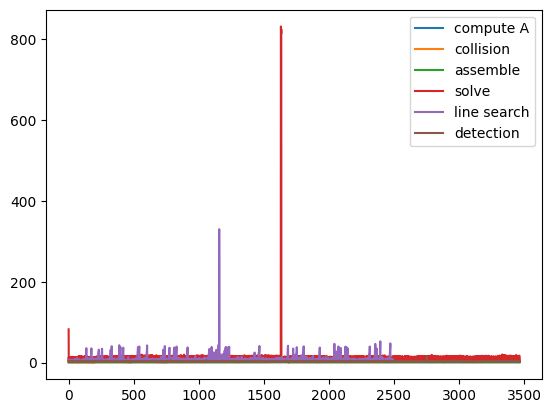

In [21]:
folder = "fem"
folder_full = f"../timing/{folder}"
file = f"{folder_full}/timeit.npz"
metadata = np.load(f"{folder_full}/metadata.npy", allow_pickle=True)
print(metadata)
data = np.load(file, allow_pickle=True)
for k in data.keys():
    plt.plot(data[k], label=k)
    print(k, "avg = ", np.mean(data[k]))
plt.legend()
print()

In [26]:
pni = 1.8062335833814196 + 2.423575504904789 + 0.10661878245816504 + 9.09800294287363 + 9.31460653830726 + 2.5508692729371036

pframe = 3.466 * pni
print("per frame = ", pframe, "per newton  = ", pni)

per frame =  87.68947636177296 per newton  =  25.299906624862366


[1.517015   1.59216889 1.56563222 1.61423833 1.54425944] [0.15739246 0.27540054 0.26300707 0.32541281 0.26489397]


<ErrorbarContainer object of 3 artists>

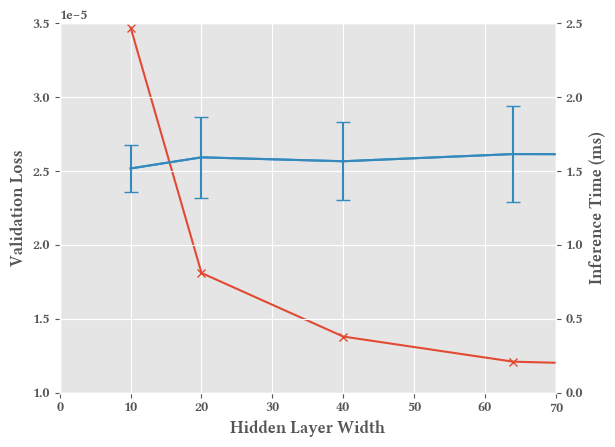

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = "../assets/fonts/linux_libertine/LinLibertine_RB.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = prop.get_name()
plt.style.use("ggplot")
x = np.array([10, 20, 40, 64, 640])
y = np.array([3.47e-5, 1.81e-5, 1.38e-5, 1.21e-5, 5e-6])

t = []
terr = []
for a in x: 
    ti = np.load(f"../data/checkpoints/b{a}/timing_dict.npy")[1:]
    t.append(np.mean(ti))
    terr.append(np.std(ti))
    # print(ti)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'x-', color = 'C0')
ax.set_xlim(0, 70)
ax.set_xlabel("Hidden Layer Width")
ax.set_ylabel("Validation Loss")

# color2 = next(ax._get_lines.prop_cycler)['color']
t = np.array(t)
terr = np.array(terr)
print(t, terr)
ax2 = ax.twinx()
ax2.plot(x, t, '-', color = 'C1')
ax2.set_ylabel("Inference Time (ms)")
ax2.set_ylim(0, 2.5)
ax.set_ylim(1.0e-5,3.5e-5)
ax2.errorbar(x, t, yerr=terr, color = 'C1', capsize=5)
# ax2.tick_params(axis='y', labelcolor='C1')
# from brokenaxes import brokenaxes 
# bax = brokenaxes(
#     xlims=((10, 70), (600, 680)),
#     hspace=0.05
# )

# bax.plot(x, y, marker='o')

(<matplotlib.patches.Rectangle at 0x186db574970>,
 (<matplotlib.patches.ConnectionPatch at 0x186db577be0>,
  <matplotlib.patches.ConnectionPatch at 0x186db37ef20>))

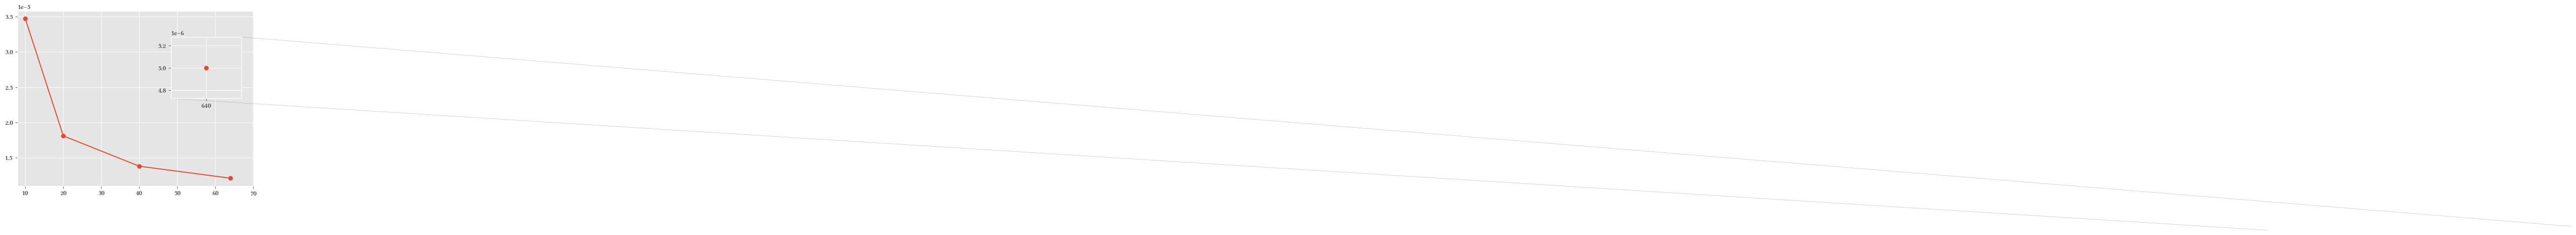

In [12]:
fig, ax = plt.subplots()

ax.plot(x[:4], y[:4], marker='o')
ax.set_xlim(8, 70)
ax.grid(True)

# inset for 640
axins = ax.inset_axes([0.65, 0.5, 0.3, 0.35])
axins.plot([640], [y[-1]], marker='o')
axins.set_xlim(600, 680)
axins.set_xticks([640])
axins.grid(True)

ax.indicate_inset_zoom(axins)